## მონაცემთა ვიზუალიზაცია

თუ თქვენ ხართ მონაცემთა ანალიტიკოსი, ვისაც ევალება სიღრმისეული ანალიტიკური დეშბორდების მომზადება, პითონი ამისთვის ნაკელბად გამოგადგებათ. აღნიშნული ამოცანების შესასრულებლად სამი ყველაზე გავრცელებული პროგრამა არის Tableau, Power BI და Qlik. აღნიშნულ პლატფორმები აგებულია ეგრე წოდებული "drag and drop" პრინციპზე, შესაბამისად ძალიან მარტივი და ინტიუიტიური როგორც ანალიტიკის მოსამზადებლად, ასევე შემდგომი კვლევისთვის თავიანთი ინტერაქციული ფუნქციონალიდან გამომდინარე.

თუმცა ჩვენ კურსი არ ეძღვნება არც მონაცემთა ანალიზს და მითუმეტეს არც მონაცემთა ვიზუალიზაციას, რომელიც ცალკე მდგომი მძლავრი და სიღრმისეული დარგია.

ჩვენი მიზანია მონაცემების შედარებით სწრაფი კვევლისთვის აღვიჭურვოთ ისეთი ხელსაწყოებით, რომლებიც შემდგომში დაგვეხამრება მოდელირებისთვის მოვაზმადოთ მონაცემები. რა თქმა უნდა პითონში არებობს მრავალი ძალიან დახვეწილი და მრავალფუნქციური ვიზუალიზაციის ბიბლიოთეკა, რომლების მეშვებითაც თითქმის ყველაფერს შეძლებთ რასაც მოისურვებთ, თუმცა ჩვენ ამ ლექციაში დავფარავთ ყველაზე გავრცელებულ, სწრაფ და მოქნილ Seaborn-ის ბიბლიოთეკას.

 matplotlib ბიბლიოთეკა (რომელზეც არის დაშენებული seaborn) როგორც წესი პითონის ყველა ვერსიას მოყვება და არ საჭიროებს დაყენება, თუმცა იგივეს ვერ ვიტყვით seaborn-ზე ამიტომ დავიწყოთ აღნიშნული ბიბლიოთეკის დაინსტალირებით

https://seaborn.pydata.org/introduction.html

In [ ]:
# ბიბლიოთეკის დაინსტალირება
!pip install seaborn

In [1]:
# საჭირო ბიბილიოთეკების იმპორტი
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# წინასწარ განსაზღვრულად matplotlib ბიბლიოთეკა, არ ბეჭდავს ვიზუალიზაციას დამატებითი .show() ბრძანების გარეშე,
# თუმცა ქვემოთ მოცემული კოდი დაგვეხმარება არსებულ ნოუთბუქში, ვიზუალიზაციის ნებისმიერი ფუნქციის გამოყენების
# შემდგომ, პირდაპირ დავბეჭდოთ გრაფიკები
%matplotlib inline

In [11]:
# seabonr-ის ფუნქცია, რომელიც გვაჩვენებს თუ რა ცხრილები აქვს ჩაშენებული ბიბლიოთეკას
sns.get_dataset_names()

/Users/levanborchkhadze/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /Users/levanborchkhadze/anaconda3/lib/python3.8/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [49]:
# რა თქმა უნდა ტიტანიკიც აქვს რომელსაც შემდეგნაირად გამოვიყენებდით
df_t = sns.load_dataset('titanic')
df_t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# წინა ლექციაში გამოყენებული ტიტანიკის მონაცემების იმპორტი
df = pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ვიზუალიზაციის ძირითადი ტიპები

### Bar chart

ბარ ჩარტი - გრაფიკი რომელიც გამოიყენება კატეგორიული მონაცემებისთვის და გადმოსცემს მის კატეგორიების მნიშვნელობებს სიმაღლეში ან სიგრძეში. შესაბამისად მას ძირითადად მონაცემების შესადარებლად აიგება. ხშირ შემთხვევაში ჰორიზონტალურ ბარ ჩარტებს ანიჭებენ უპირატესობას, რადგან თვალისთვის სიგრძის შედარება უფრო მარტივია ვიდრე სიმაღლის.

#### თუ დავაკვირდებით, ტიტანიკზე არსებობდა 3 კლასის ბილეთი, პირველი, მეორე და მესამე. ვნახოთ მათი განაწილება

In [12]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

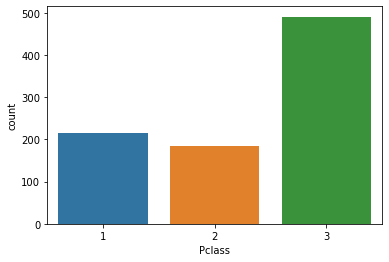

In [52]:
sns.countplot(df.Pclass)

#### დავაჯგუფოთ კლასის მიხედვით და ვნახოთ რომელი კლასის მგზავრებიდან რამდენი პროცენტი გადარჩა

In [17]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

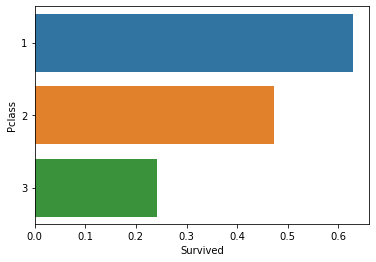

In [54]:
sns.barplot(x = df['Survived'], y = df['Pclass'], orient = "h", ci = None)

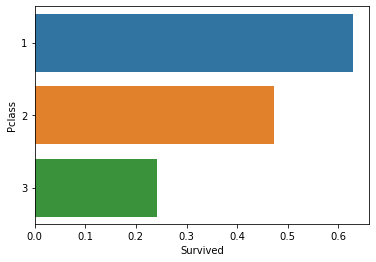

In [55]:
sns.barplot(x = "Survived", y = "Pclass", data = df, orient = 'h', ci = None)

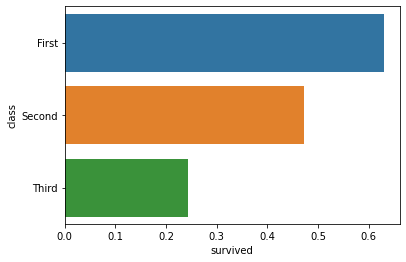

In [68]:
sns.barplot(x = "survived", y = "class", data = df_t, ci = None)

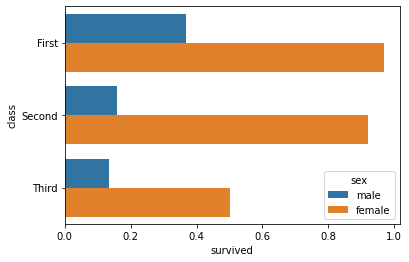

In [69]:
sns.barplot(x = "survived", y = "class", data = df_t, ci = None, hue='sex')

#### ახლა გავარკვიოთ რომელ სქესის ადამიანებიდან გადარჩნენ უფრო დიდი პროცენტი

In [47]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

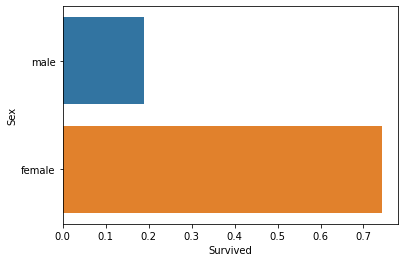

In [ ]:
sns.barplot(x = "Survived", y = "Sex", data = df, ci=None)

### Histogram

ჰისტოგრამა - გამოიყენება უწყვეტი მონაცემების განაწილების (მიახლოებული) ვიზუალიზაციისთვის. ჰისტოგრამის ასაგებად, პირველ რიგში საჭიროა ცვლადის ტოლ ინტერვალეად გაყოფა და შემდეგ დათვლა თუ რამდენი მონაცემი ჩავარდა თითოეულ ინტერვალში (ბინში).

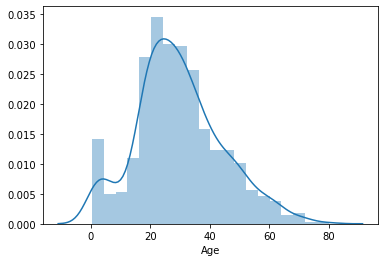

In [65]:
sns.distplot(df['Age'])

რა განსხვავება იქნებოდა ზემოთ მოცემულ იგრაფიკი countplot-ით რომ აგვეგო?

In [157]:
sns.countplot(df['Age'])

In [66]:
df.shape

(891, 12)

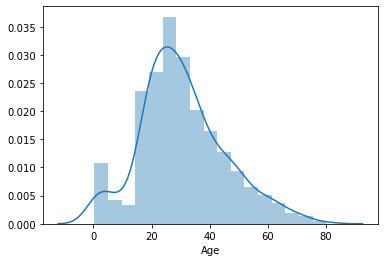

In [42]:
# კაცების ასაკის განაწილება
plt.figure()
sns.distplot(df[df['Sex']=='male'].Age)

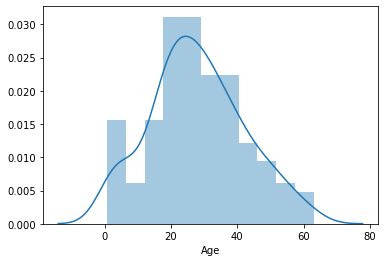

In [43]:
# ქალების ასაკის განაწილება
plt.figure()
sns.distplot(df[df['Sex']=='female'].Age)

<Figure size 864x432 with 0 Axes>

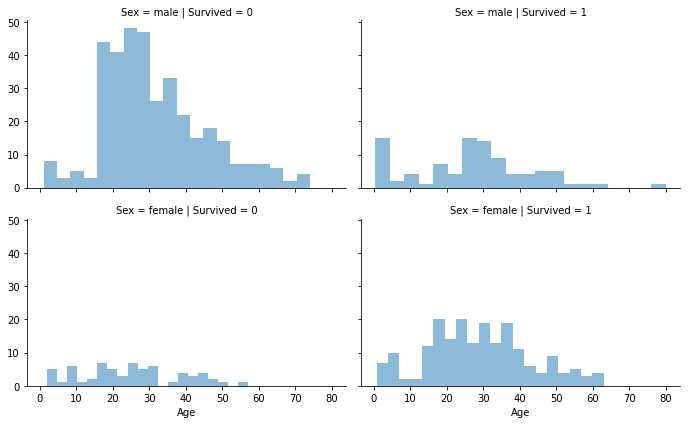

In [168]:
# კაცების და ქალების ასაკის განაწილება გადარჩენილობის მიხედვით
plt.figure(figsize=(12,6))
grid = sns.FacetGrid(df, col='Survived', row='Sex',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Box plot

ბოქს პლოტი წარმოადგენს ცვლადის აღწერითი სტატისტიკის ვიზუალიზაციას.

In [91]:

display(Image(url='https://miro.medium.com/max/4800/1*NRlqiZGQdsIyAu0KzP7LaQ.png', width=600))

In [71]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

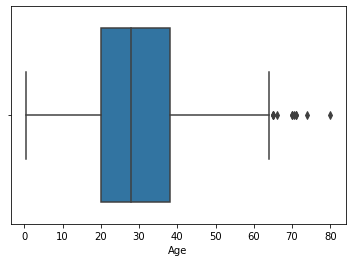

In [72]:
sns.boxplot(df.Age)

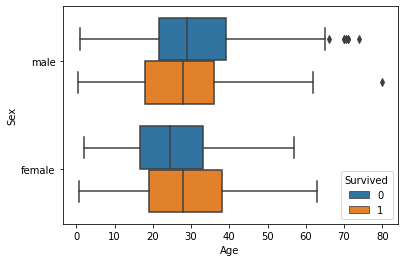

In [80]:
sns.boxplot(x="Age", y="Sex", data=df, hue='Survived')

### Line Chart

გრაფიკის ტიპი რომელიც სერიული ტიპის მონაცემებს წარმოაჩენს როგორც უწყვეტი ხაზით დაკავშირებულ მრავალ წერტილს. აღნიშნული ვიზუზალიზაცია ძირითადად გამოიყენება დროზე დამოკიდებული ცვლდებისთის.

In [93]:
df_flights = sns.load_dataset("flights")
df_flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


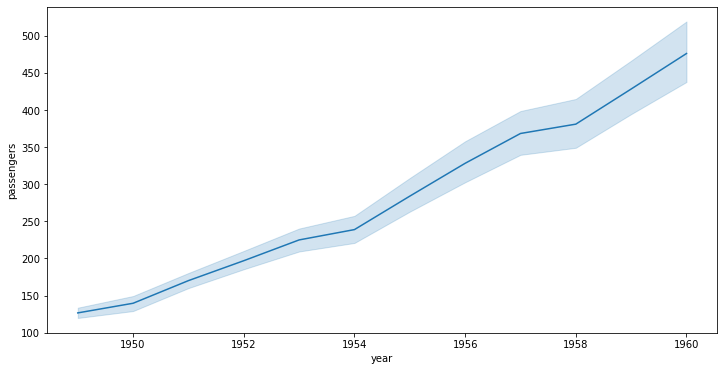

In [111]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="year", y="passengers")

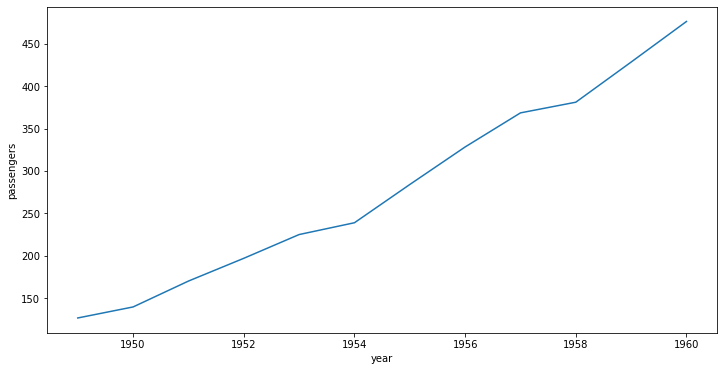

In [112]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="year", y="passengers", ci=None)

In [160]:
# რას დააბრუნებს ეს ბრძანება??
df_flights['year_month'] = df_flights['year'] + df_flights['month']

In [161]:
df_flights.info()

In [ ]:
df_flights['year_month'] = str(df_flights['year']) + str(df_flights['month'])

In [121]:
df_flights['year_month'] = df_flights['year'].astype('str') + df_flights['month'].astype('str')

In [122]:
df_flights.head()

,year,month,passengers,year_month
0,1949,January,112,1949January
1,1949,February,118,1949February
2,1949,March,132,1949March
3,1949,April,129,1949April
4,1949,May,121,1949May


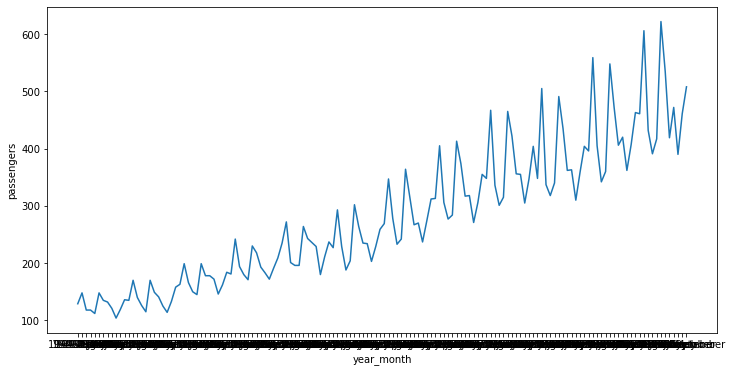

In [123]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="year_month", y="passengers")

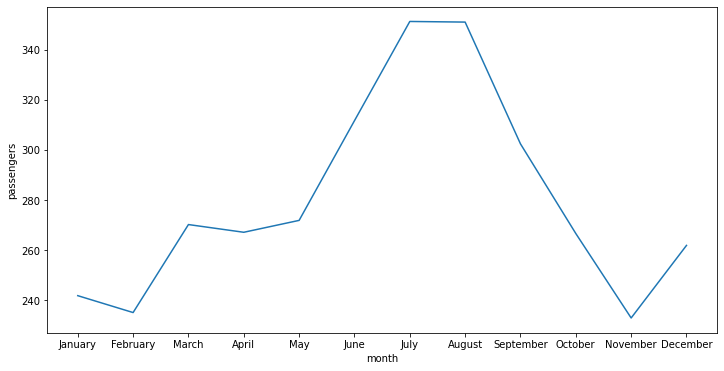

In [113]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="month", y="passengers", ci=None)

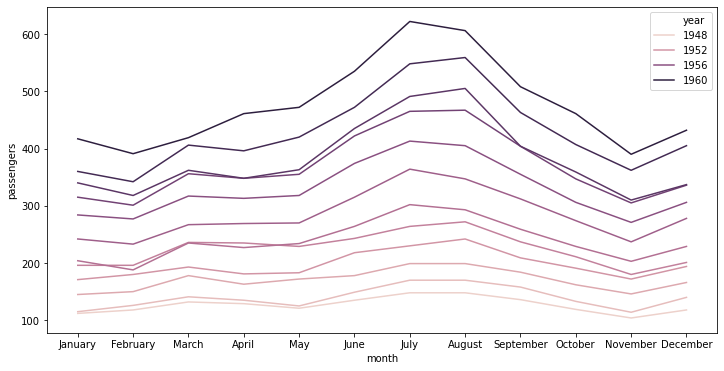

In [124]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="month", y="passengers", hue='year')

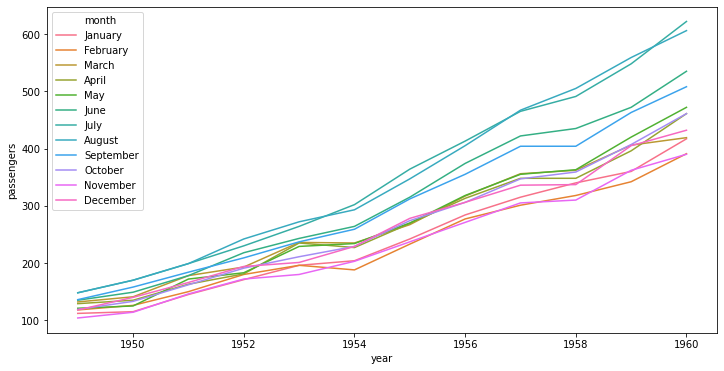

In [125]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_flights, x="year", y="passengers", hue='month')

### Scatter plot

გაბნეულობის გრაფიკი - გვიჩვენებს ორი ცვლადის მნიშვნელობებს წერტილებად. ყველაზე ხშირად გამოიყენება ცვლადებს შორის დამოკიდებულების (კორელაციის) შესაფასებლად. 

In [173]:
df_penguins = sns.load_dataset('penguins')
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


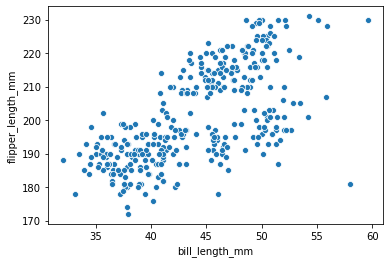

In [177]:
sns.scatterplot(df_penguins.bill_length_mm, df_penguins.flipper_length_mm)

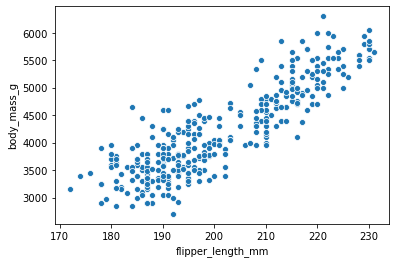

In [192]:
sns.scatterplot(df_penguins.flipper_length_mm, df_penguins.body_mass_g)

In [194]:
df_penguins[['flipper_length_mm', 'body_mass_g']].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.871202
body_mass_g,0.871202,1.000000


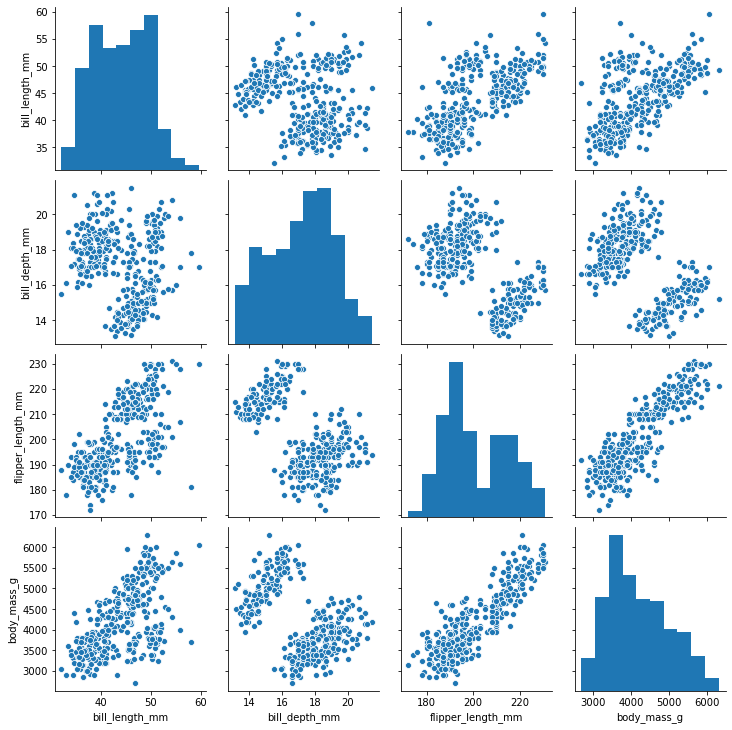

In [132]:
sns.pairplot(df_penguins)

In [195]:
df_penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


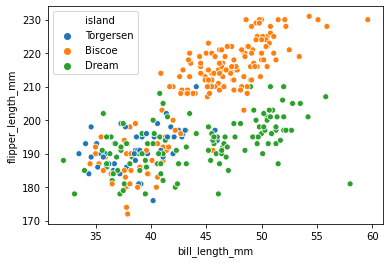

In [185]:
sns.scatterplot(df_penguins.bill_length_mm, df_penguins.flipper_length_mm, hue=df_penguins.island)

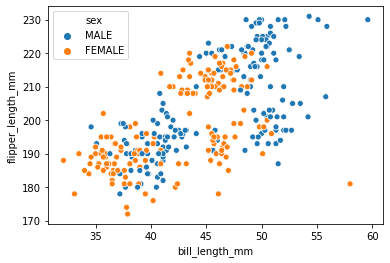

In [184]:
sns.scatterplot(df_penguins.bill_length_mm, df_penguins.flipper_length_mm, hue=df_penguins.sex)

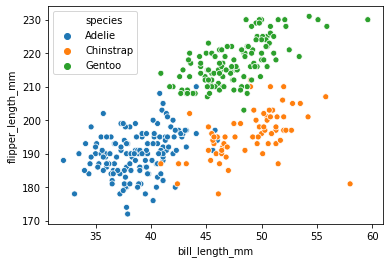

In [183]:
sns.scatterplot(df_penguins.bill_length_mm, df_penguins.flipper_length_mm, hue=df_penguins.species)

In [ ]:
sns.scatterplot(df_penguins.bill_depth_mm, df_penguins.body_mass_g, hue=df_penguins.sex)

### Heatmap

ვიზუალიზაციის ტიპი რომელიც ცვლადებს აფერადებს მათი მნიშვნელობების შესაბამისად. ყველაზე ხშირად გამოიყენება რუქაზე ხდომილებების აღსაწერად და კორელაციების მატრიცის ვიზუალიზაციისთის, თვალისთვის უფრო მარტივად აღსაქმელად. 

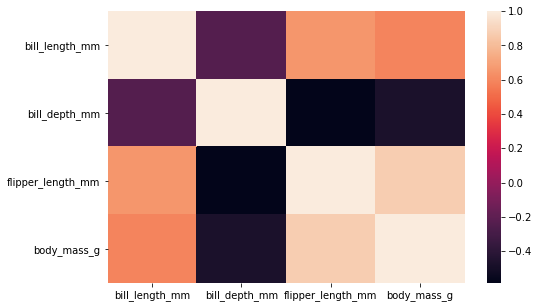

In [187]:
plt.figure(figsize=(8,5))
sns.heatmap(df_penguins.corr())

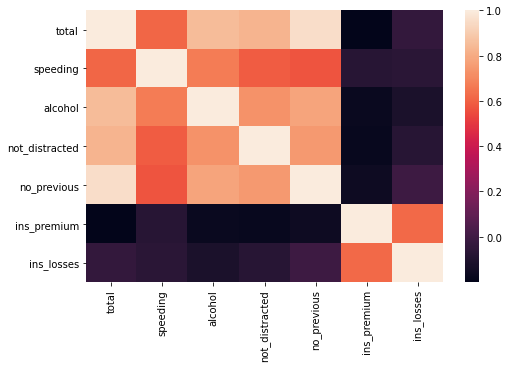

In [188]:
plt.figure(figsize=(8,5))
sns.heatmap(sns.load_dataset('car_crashes').corr())

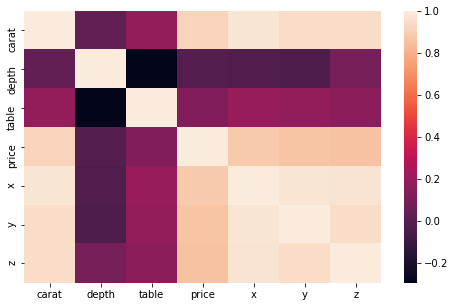

In [189]:
plt.figure(figsize=(8,5))
sns.heatmap(sns.load_dataset('diamonds').corr())

In [164]:
sns.load_dataset('mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


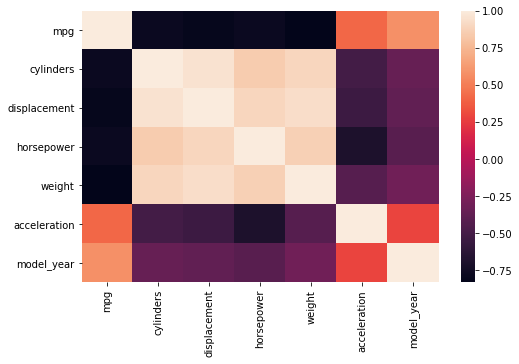

In [190]:
plt.figure(figsize=(8,5))
sns.heatmap(sns.load_dataset('mpg').corr())